### CNN - 고양이와 강아지 구분

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import *
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fmt
import random

In [3]:
path = './cats_and_dogs/cats_and_dogs_train/'

In [4]:
filenames = os.listdir(path)

print('len(filename) :',len(filenames))
print(type(filenames))

len(filename) : 2000
<class 'list'>


#### 이미지들을 0 또는 1로 레이블링

In [5]:
categories=[]
for filename in filenames:
    category = filename.split(' ')[0]
    if category == 'cats':
        categories.append(0)
    else:
        categories.append(1)
        
print(categories)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
df = pd.DataFrame({'filename':filenames, 'label':categories})
df

,filename,label
0,cats (1).jpg,0
1,cats (10).jpg,0
2,cats (100).jpg,0
3,cats (1000).jpg,0
4,cats (101).jpg,0
...,...,...
1995,dogs (995).jpg,1
1996,dogs (996).jpg,1
1997,dogs (997).jpg,1
1998,dogs (998).jpg,1


In [7]:
print(df.filename)
print('-'*50)
print(df.label)

0          cats (1).jpg
1         cats (10).jpg
2        cats (100).jpg
3       cats (1000).jpg
4        cats (101).jpg
             ...       
1995     dogs (995).jpg
1996     dogs (996).jpg
1997     dogs (997).jpg
1998     dogs (998).jpg
1999     dogs (999).jpg
Name: filename, Length: 2000, dtype: object
--------------------------------------------------
0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: label, Length: 2000, dtype: int64


#### 이미지 분포 확인

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


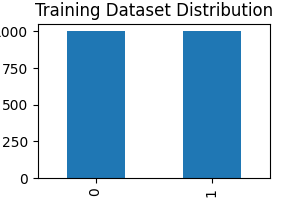

Text(0.5, 1.0, 'Training Dataset Distribution')

In [9]:
plt.figure(figsize=(3,2))
df['label'].value_counts().plot.bar()
plt.title('Training Dataset Distribution')

<IPython.core.display.Javascript object>


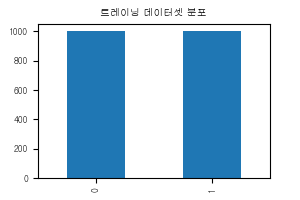

Text(0.5, 1.0, '트레이닝 데이터셋 분포')

In [10]:
font_path = "C:\\Windows\\Fonts\\gulim.ttc"  # 한글 폰트 셋팅
font_name = fmt.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name, size=6)

plt.figure(figsize=(3,2))
df['label'].value_counts().plot.bar()
plt.title('트레이닝 데이터셋 분포')

In [11]:
sample = random.choice(filenames)
sample

'cats (283).jpg'

<IPython.core.display.Javascript object>


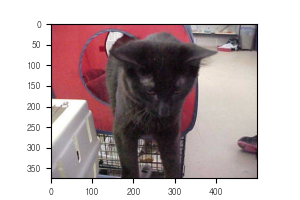

In [12]:
image = load_img(path+sample)
plt.figure(figsize=(3,2))
plt.imshow(image)

#### 딥러닝

In [13]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT= 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL = 3  # RGB color

In [14]:
# 0과 1 레이블링에 이름으로 변환
df['label'] = df['label'].replace({0:'cat', 1:'dog'})
df

,filename,label
0,cats (1).jpg,cat
1,cats (10).jpg,cat
2,cats (100).jpg,cat
3,cats (1000).jpg,cat
4,cats (101).jpg,cat
...,...,...
1995,dogs (995).jpg,dog
1996,dogs (996).jpg,dog
1997,dogs (997).jpg,dog
1998,dogs (998).jpg,dog


In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNEL)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

* keras 에서 sigmoid면 binary_crossentropy, softmax면 categorical_crossentropy 사용하는 것이 좋음.  
최종 출력 값이 [1,0] or [0,1] 의 원-핫인코딩 형태이면서  
softmax_cross_entropy를 loss로 하고자 할 때는 categorical_crossentropy를 사용한다.

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [18]:
earlystop = EarlyStopping(patience=10)

<참고>   
ReduceLROnPlateau()함수: learning rate(학습률)이 개선되지 않을 때, 아래의 예시와 같이 learning rate(학습률)을 동적으로 조정할 수 있다.  

예시)   
learning_rate_reduction=ReduceLROnPlateau(  
monitor= 'val_loss',<span style="color:blue;  font-weight:bold; font-size:100%"> #'val_loss'를 모니터링하면서</span>     
patience = 2,<span style="color:blue;  font-weight:bold; font-size:100%"> #2회 이상 val_loss가 줄어들지 않으면</span>   
factor = 0.5,<span style="color:blue;  font-weight:bold; font-size:100%"> #learning rate을 1/2로 줄인다.</span>    
min_lr=0.0001,<span style="color:blue;  font-weight:bold; font-size:100%"> #learning rate의 하한선 0.0001로 지정 </span>  
verbose=1)

In [19]:
learning_rate_reduction=ReduceLROnPlateau(monitor= 'val_loss', #'val_loss'를 모니터링하면서
                                        patience = 2, #2회 이상 val_loss가 줄어들지 않으면
                                        factor = 0.5, #learning rate을 1/2로 줄인다.
                                        min_lr=0.0001, #learning rate의 하한선 0.0001로 지정
                                        verbose=1)

In [20]:
callbacks = [earlystop, learning_rate_reduction]  # 케라스에서 제공하는 콜백함수 사용
callbacks

In [21]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state = 42)
print(len(train_df))
print(len(val_df))

1600
400


In [22]:
# 인덱스 번호 재정렬
train_df = train_df.reset_index(drop=True)
train_df

,filename,label
0,cats (970).jpg,cat
1,cats (314).jpg,cat
2,cats (836).jpg,cat
3,cats (721).jpg,cat
4,cats (477).jpg,cat
...,...,...
1595,dogs (215).jpg,dog
1596,dogs (363).jpg,dog
1597,cats (873).jpg,cat
1598,dogs (511).jpg,dog


In [23]:
val_df = val_df.reset_index(drop=True)
val_df

,filename,label
0,dogs (873).jpg,dog
1,cats (416).jpg,cat
2,dogs (399).jpg,dog
3,cats (913).jpg,cat
4,dogs (359).jpg,dog
...,...,...
395,cats (968).jpg,cat
396,dogs (354).jpg,dog
397,dogs (764).jpg,dog
398,cats (333).jpg,cat


In [24]:
print("전체 이미지 데이터 개수 : ", len(df))
print("학습용 전체 이미지 데이터 개수 : ", len(train_df))
print("검증용 전체 이미지 데이터 개수 : ", len(val_df))

전체 이미지 데이터 개수 :  2000
학습용 전체 이미지 데이터 개수 :  1600
검증용 전체 이미지 데이터 개수 :  400


In [25]:
print("학습용 전체 이미지 데이터 개수 : ", len(train_df))
train_df['label'].value_counts()

학습용 전체 이미지 데이터 개수 :  1600


cat    801
dog    799
Name: label, dtype: int64

In [26]:
print("검증용 전체 이미지 데이터 개수 : ", len(val_df))
val_df['label'].value_counts()

검증용 전체 이미지 데이터 개수 :  400


dog    201
cat    199
Name: label, dtype: int64

#### 이미지 재생성으로 데이터셋 증식

In [27]:
print(train_df.shape)
print(val_df.shape)

(1600, 2)
(400, 2)


In [28]:
total_train = train_df.shape[0]
total_val = val_df.shape[0]

In [29]:
batch_size=15

1) ImageDataGenerator 사용  

https://keras.io/ko/preprocessing/image/

<참고>  

▶rotation_range: 정수. 무작위 회전의 각도 범위입니다.    

▶rescale: 크기 재조절 인수. 디폴트 값은 None입니다.  
None 혹은 0인 경우 크기 재조절이 적용되지 않고,  
그 외의 경우 (다른 변형을 전부 적용한 후에) 데이터를 주어진 값으로 곱합니다.    

▶shear_range: 부동소수점. 층밀리기의 강도입니다. (도 단위의 반시계 방향 층밀리기 각도) 

▶zoom_range: 부동소수점 혹은 [하한, 상산]. 무작위 줌의 범위입니다.  
부동소수점인 경우, [하한, 상한] = [1-zoom_range, 1+zoom_range]입니다.

▶horizontal_flip: 불리언. 인풋을 무작위로 가로로 뒤집습니다.

▶width_shift_range: 부동소수점, 1D 형태의 유사배열 혹은 정수

▶height_shift_range: 부동소수점, 1D 형태의 유사배열 혹은 정수

In [30]:
train_datagen=ImageDataGenerator(rotation_range=15, 
                                rescale=1./255,  # 0~1 사이로 변경
                                shear_range=0.1,  # 반시계방향
                                zoom_range=0.2,  # 확대축소 20%
                                horizontal_flip=True,  # 좌우반전 True
                                width_shift_range=0.1,  # 좌우이동 10%
                                height_shift_range=0.1)  # 상하이동 10%

In [31]:
train_datagen

In [32]:
#flow_from_dataframe 클래스 사용전 현재 학습용 데이터셋 상태 확인

print("-"*20, "train_df", "-"*20)
print(train_df)

print("-"*20, "path", "-"*20)
print(path)

print("-"*20, "filename", "-"*20)
print(train_df.filename)

print("-"*20, "label", "-"*20)
print(train_df.label)

print("-"*20, "IMAGE_SIZE", "-"*20)
print(IMAGE_SIZE)

print("-"*20, "batch_size ", "-"*20)
print(batch_size)

-------------------- train_df --------------------
            filename label
0     cats (970).jpg   cat
1     cats (314).jpg   cat
2     cats (836).jpg   cat
3     cats (721).jpg   cat
4     cats (477).jpg   cat
...              ...   ...
1595  dogs (215).jpg   dog
1596  dogs (363).jpg   dog
1597  cats (873).jpg   cat
1598  dogs (511).jpg   dog
1599  dogs (211).jpg   dog

[1600 rows x 2 columns]
-------------------- path --------------------
./cats_and_dogs/cats_and_dogs_train/
-------------------- filename --------------------
0       cats (970).jpg
1       cats (314).jpg
2       cats (836).jpg
3       cats (721).jpg
4       cats (477).jpg
             ...      
1595    dogs (215).jpg
1596    dogs (363).jpg
1597    cats (873).jpg
1598    dogs (511).jpg
1599    dogs (211).jpg
Name: filename, Length: 1600, dtype: object
-------------------- label --------------------
0       cat
1       cat
2       cat
3       cat
4       cat
       ... 
1595    dog
1596    dog
1597    cat
1598    dog


2) flow_from_dataframe 사용

class_mode 옵션 : "binary", "categorical", "input", "multi_output", "raw", sparse "또는 None 중 하나를 사용 

<class_mode 옵션 설명>   
"binary" : 이진 레이블의 1D numpy 배열     
"categorical": 원-핫 인코딩 된 라벨의 2D numpy 배열, 다중 라벨 출력 지원  
"input": 입력 이미지와 동일한 이미지 (주로 오토 인코더와 함께 작동)  
"multi_output": 다른 열의 값이있는 목록  
"raw": numpy 배열의 y_col열의 값  
"sparse" 또는 None : 정수 레이블의 1D numpy 배열, None : 반환되는 대상이 없습니다.   

model.predict() :생성기는에서 사용하는 데 유용한 이미지 데이터의 배치 만 생성합니다.

In [33]:
train_generator = train_datagen.flow_from_dataframe(train_df, path, x_col='filename', y_col='label',
                                    target_size=IMAGE_SIZE, class_mode='categorical', # 원핫 인코딩
                                    batch_size=batch_size)

Found 1600 validated image filenames belonging to 2 classes.


In [34]:
train_generator

<IPython.core.display.Javascript object>


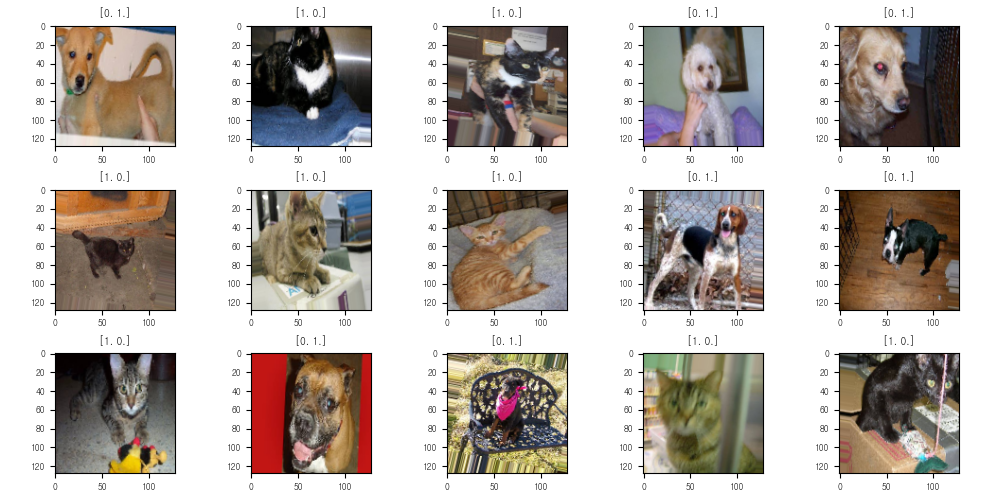

C:\Users\user12\anaconda3\envs\ai\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [35]:
plt.figure(figsize=(10,5))

for i in range(0,15):
    plt.subplot(3,5, i+1)
    for x, y in train_generator:
        # print(x[0])  # x[0] ~ x[14] 사이의 값을 사용, 이미지 RGB 픽셀 값
        # print(y[0])  # y: 이미지 라벨 값 (고양이 or 개)
        image = x[0]
        plt.imshow(image)
        plt.title(y[0])       
        break
        
plt.tight_layout()

In [36]:
val_datagen=ImageDataGenerator(rescale=1./255)

In [37]:
#flow_from_dataframe 클래스 사용전 현재 검증용 데이터셋 상태 확인

print("-"*20, "val_df", "-"*20)
print(val_df)

print("-"*20, "path", "-"*20)
print(path)

print("-"*20, "filename", "-"*20)
print(val_df.filename)

print("-"*20, "label", "-"*20)
print(val_df.label)

print("-"*20, "IMAGE_SIZE", "-"*20)
print(IMAGE_SIZE)

print("-"*20, "batch_size ", "-"*20)
print(batch_size)

-------------------- val_df --------------------
           filename label
0    dogs (873).jpg   dog
1    cats (416).jpg   cat
2    dogs (399).jpg   dog
3    cats (913).jpg   cat
4    dogs (359).jpg   dog
..              ...   ...
395  cats (968).jpg   cat
396  dogs (354).jpg   dog
397  dogs (764).jpg   dog
398  cats (333).jpg   cat
399  cats (580).jpg   cat

[400 rows x 2 columns]
-------------------- path --------------------
./cats_and_dogs/cats_and_dogs_train/
-------------------- filename --------------------
0      dogs (873).jpg
1      cats (416).jpg
2      dogs (399).jpg
3      cats (913).jpg
4      dogs (359).jpg
            ...      
395    cats (968).jpg
396    dogs (354).jpg
397    dogs (764).jpg
398    cats (333).jpg
399    cats (580).jpg
Name: filename, Length: 400, dtype: object
-------------------- label --------------------
0      dog
1      cat
2      dog
3      cat
4      dog
      ... 
395    cat
396    dog
397    dog
398    cat
399    cat
Name: label, Length: 400, 

In [38]:
val_generator = train_datagen.flow_from_dataframe(val_df, path, x_col='filename', y_col='label',
                                    target_size=IMAGE_SIZE, class_mode='categorical', # 원핫 인코딩
                                    batch_size=batch_size)

Found 400 validated image filenames belonging to 2 classes.


<IPython.core.display.Javascript object>


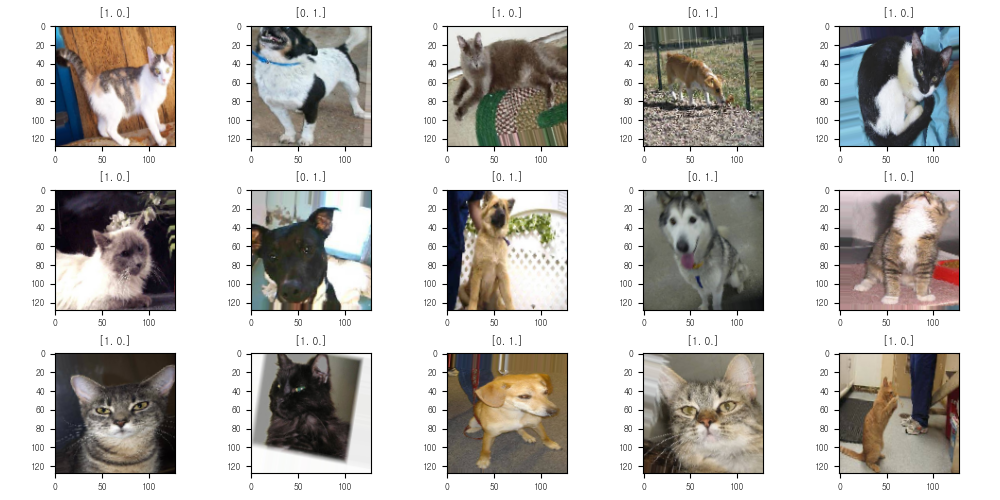

C:\Users\user12\anaconda3\envs\ai\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [39]:
plt.figure(figsize=(10,5))

for i in range(0,15):
    plt.subplot(3,5, i+1)
    for x, y in val_generator:
        # print(x[0])  # x[0] ~ x[14] 사이의 값을 사용, 이미지 RGB 픽셀 값
        # print(y[0])  # y: 이미지 라벨 값 (고양이 or 개)
        image = x[0]
        plt.imshow(image)
        plt.title(y[0])       
        break
        
plt.tight_layout()

training 데이터 중 랜덤으로 1개 샘플 데이터 추출하여 이미지 재생성 (이미지 하나로 변환 확인)  
1) 판다스 구조에서 임의의 이미지 1개 출력

In [40]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_df

,filename,label
0,cats (317).jpg,cat


In [41]:
ex_df = example_df.iloc[[0],[0]]
ex_df

,filename
0,cats (317).jpg


In [42]:
print(ex_df)
print(type(ex_df))

         filename
0  cats (317).jpg
<class 'pandas.core.frame.DataFrame'>


In [43]:
ex_df = str(ex_df)
ex_df

'         filename\n0  cats (317).jpg'

In [44]:
print(type(ex_df))
print(len(ex_df))

<class 'str'>
35


In [45]:
ex = str(ex_df[-14:])
ex

'cats (317).jpg'

<IPython.core.display.Javascript object>


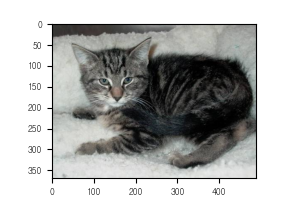

In [46]:
plt.figure(figsize=(3,2))
image = load_img(path+ex)
plt.imshow(image)

2) flow_from_dataframe 사용

In [47]:
example_generator = train_datagen.flow_from_dataframe(
                    example_df,
                    path,
                    x_col = "filename",
                    y_col = "label",
                    target_size = IMAGE_SIZE,
                    class_mode = "categorical")

Found 1 validated image filenames belonging to 1 classes.


<IPython.core.display.Javascript object>


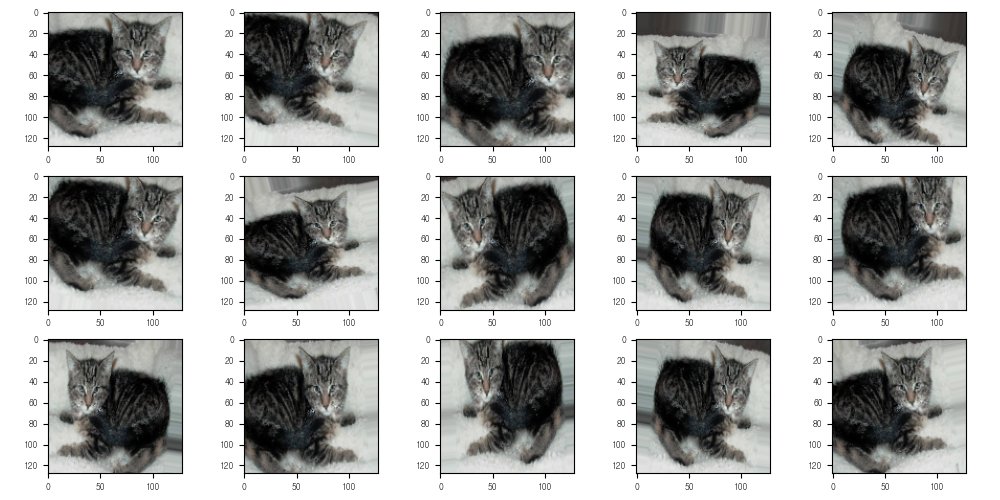

In [48]:
plt.figure(figsize=(10,5))
for i in range(0,15):
    plt.subplot(3,5,i+1)
    for xBatch, yBatch in example_generator:
        image = xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()

In [49]:
epochs = 50

history = model.fit_generator(
    train_generator, 
    epochs = epochs, 
    steps_per_epoch = total_train//batch_size ,  # total_train(1600개) / batch_size(15개) = 106.6666 증식
    validation_data=  val_generator,
    validation_steps = total_val//batch_size,  # total_validate(400개) / batch_size(15개) = 26.6666 증식
)

# 모델 저장 
model.save_weights("model.h5")

Epoch 1/50
106/106 [==============================] - 43s 406ms/step - loss: 1.2103 - accuracy: 0.5628 - val_loss: 3.5008 - val_accuracy: 0.4974
Epoch 2/50
106/106 [==============================] - 43s 403ms/step - loss: 0.8780 - accuracy: 0.5975 - val_loss: 0.8230 - val_accuracy: 0.5143
Epoch 3/50
106/106 [==============================] - 43s 403ms/step - loss: 0.7873 - accuracy: 0.6177 - val_loss: 0.6637 - val_accuracy: 0.5013
Epoch 4/50
106/106 [==============================] - 42s 401ms/step - loss: 0.7291 - accuracy: 0.6177 - val_loss: 0.9761 - val_accuracy: 0.4987
Epoch 5/50
106/106 [==============================] - 42s 400ms/step - loss: 0.6482 - accuracy: 0.6587 - val_loss: 0.5579 - val_accuracy: 0.5818
Epoch 6/50
106/106 [==============================] - 43s 403ms/step - loss: 0.6700 - accuracy: 0.6416 - val_loss: 0.7772 - val_accuracy: 0.6052
Epoch 7/50
106/106 [==============================] - 42s 400ms/step - loss: 0.6560 - accuracy: 0.6415 - val_loss: 0.6292 - val_ac

In [50]:
historyDict = history.history
historyDict

{'val_loss': [3.500831365585327,
  0.82297283411026,
  0.66367107629776,
  0.9761043787002563,
  0.557934045791626,
  0.7771956920623779,
  0.6291850209236145,
  0.5615808963775635,
  0.46155470609664917,
  0.5712578296661377,
  0.48868778347969055,
  1.26116144657135,
  0.572436511516571,
  0.6184342503547668,
  0.5400280356407166,
  0.6467300653457642,
  0.8121963739395142,
  0.6920090913772583,
  0.4926881194114685,
  0.6098939180374146,
  0.3999413847923279,
  0.8936278223991394,
  0.4917231798171997,
  0.9105736017227173,
  0.46932393312454224,
  0.8716636896133423,
  0.8552568554878235,
  0.7160903811454773,
  1.169144868850708,
  0.4561852514743805,
  1.3058981895446777,
  0.9893158674240112,
  0.573777437210083,
  0.3943909704685211,
  0.46141478419303894,
  0.491987019777298,
  0.6619462966918945,
  0.7281109690666199,
  0.43916818499565125,
  0.7330151200294495,
  0.6659119725227356,
  0.7908324599266052,
  0.3352136015892029,
  0.43988654017448425,
  0.6794329285621643,
  0.

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [52]:
epo = range(1, len(acc)+1)
epo

range(1, 51)

<IPython.core.display.Javascript object>


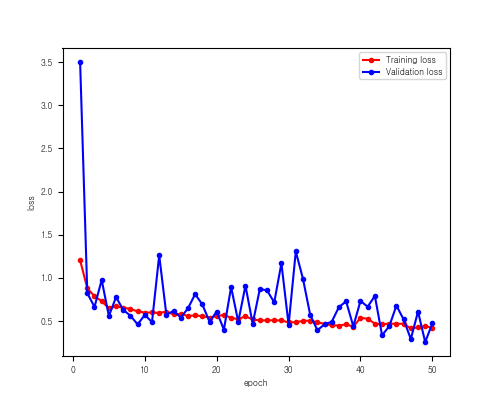

In [53]:
plt.figure(figsize=(5,4))
epo = range(1, len(acc)+1)
plt.plot(epo, loss, marker='.', color='red', label='Training loss')
plt.plot(epo, val_loss, marker='.', color='blue', label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

<IPython.core.display.Javascript object>


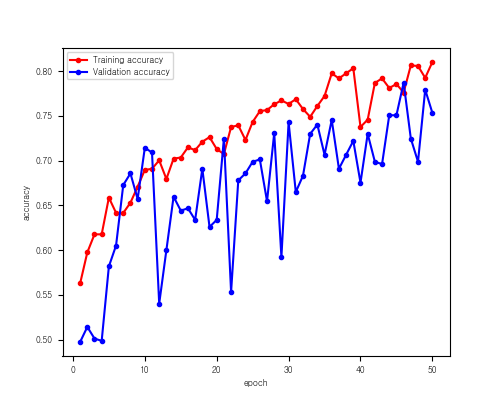

In [54]:
plt.figure(figsize=(5,4))
epo = range(1, len(acc)+1)
plt.plot(epo, acc, marker='.', color='red', label='Training accuracy')
plt.plot(epo, val_acc, marker='.', color='blue', label='Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [55]:
os.getcwd()

'c:\\ai\\2021_ai'

In [56]:
os.chdir('cats_and_dogs')

In [57]:
os.getcwd()

'c:\\ai\\2021_ai\\cats_and_dogs'

In [58]:
test_path = './cats_and_dogs_test/'

In [59]:
filenames = os.listdir(test_path)
filenames

['test_cat (0).jpg',
 'test_cat (1).jpg',
 'test_dog (0).jpg',
 'test_dog (1).jpg']

In [60]:
test_df = pd.DataFrame({'filename':filenames})
test_df

,filename
0,test_cat (0).jpg
1,test_cat (1).jpg
2,test_dog (0).jpg
3,test_dog (1).jpg


In [61]:
test_df.shape

(4, 1)

In [62]:
test_len = test_df.shape[0]
test_len

4

In [63]:
batch_size

15

In [ ]:
# 방식 1 : 테스트 이미지, 원본 그대로 0~1 변환하여 사용
# test_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
# 방식 2 : 테스트 이미지 증식

test_datagen=ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,  #0~1 사이로 변경 
        shear_range=0.1,  #반시계방향 
        zoom_range=0.2,   # 확대축소 20%
        horizontal_flip=True,   # 좌우반전 True
        width_shift_range=0.1,    # 좌우이동 10%
        height_shift_range=0.1)    # 상하이동 10%

In [65]:
test_generator = test_datagen.flow_from_dataframe(test_df, test_path, 
                                x_col='filename', y_col = None,
                                target_size = IMAGE_SIZE, class_mode = None,
                                batch_size = batch_size, shuffle = False)

Found 4 validated image filenames.


In [66]:
predict = model.predict_generator(test_generator, callbacks = callbacks)

In [67]:
print("테스트 이미지 개수 : ", len(predict))
print("테스트 결과  ")
print(predict)

테스트 이미지 개수 :  4
테스트 결과  
[[0.1994754  0.80052465]
 [0.21050549 0.7894945 ]
 [0.4616971  0.5383029 ]
 [0.02817398 0.971826  ]]


In [68]:
result = np.argmax(predict, axis=1)
result

array([1, 1, 1, 1], dtype=int64)

In [69]:
for i in range(len(predict)):
    if result[i] == 0:
        print(i, '번째 이미지 예측 결과 :', result[i], ", cat")
    else:
        print(i, '번째 이미지 예측 결과 :', result[i], ", dog")

0 번째 이미지 예측 결과 : 1 , dog
1 번째 이미지 예측 결과 : 1 , dog
2 번째 이미지 예측 결과 : 1 , dog
3 번째 이미지 예측 결과 : 1 , dog


In [70]:
print(test_len)
print(batch_size)

4
15


In [71]:
predict = model.predict_generator(test_generator, steps=10, # 기본 이미지 2개 x 10 steps = 20개
                                  callbacks = callbacks)
print('테스트 이미지 개수:', len(predict))

테스트 이미지 개수: 40


In [72]:
print(predict)

[[0.3628587  0.6371413 ]
 [0.44161126 0.5583888 ]
 [0.15736924 0.84263074]
 [0.16469084 0.83530915]
 [0.7324019  0.26759806]
 [0.5396701  0.46032992]
 [0.10807776 0.89192224]
 [0.03369036 0.9663096 ]
 [0.412364   0.58763605]
 [0.134781   0.865219  ]
 [0.25642133 0.7435786 ]
 [0.01644308 0.98355687]
 [0.4778105  0.52218944]
 [0.84382933 0.15617065]
 [0.36446035 0.6355396 ]
 [0.03513822 0.9648618 ]
 [0.30060267 0.6993973 ]
 [0.5042989  0.4957011 ]
 [0.33572602 0.664274  ]
 [0.00435311 0.9956469 ]
 [0.69973296 0.30026704]
 [0.41536227 0.58463776]
 [0.14198442 0.8580156 ]
 [0.06564932 0.93435067]
 [0.33417687 0.6658231 ]
 [0.08796133 0.9120387 ]
 [0.20326924 0.7967308 ]
 [0.04660419 0.9533958 ]
 [0.30661693 0.6933831 ]
 [0.15527642 0.8447236 ]
 [0.14934789 0.8506521 ]
 [0.01171965 0.9882804 ]
 [0.36805615 0.6319439 ]
 [0.21873295 0.78126705]
 [0.15522319 0.84477675]
 [0.01236423 0.9876358 ]
 [0.42858335 0.57141656]
 [0.13343339 0.8665666 ]
 [0.2027561  0.7972439 ]
 [0.03582326 0.9641768 ]]

In [73]:
result = np.argmax(predict, axis=1)
result

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [74]:
for i in range(len(predict)):
    if result[i] == 0:
        print(i, '번째 이미지 예측 결과 :', result[i], ", cat")
    else:
        print(i, '번째 이미지 예측 결과 :', result[i], ", dog")

0 번째 이미지 예측 결과 : 1 , dog
1 번째 이미지 예측 결과 : 1 , dog
2 번째 이미지 예측 결과 : 1 , dog
3 번째 이미지 예측 결과 : 1 , dog
4 번째 이미지 예측 결과 : 0 , cat
5 번째 이미지 예측 결과 : 0 , cat
6 번째 이미지 예측 결과 : 1 , dog
7 번째 이미지 예측 결과 : 1 , dog
8 번째 이미지 예측 결과 : 1 , dog
9 번째 이미지 예측 결과 : 1 , dog
10 번째 이미지 예측 결과 : 1 , dog
11 번째 이미지 예측 결과 : 1 , dog
12 번째 이미지 예측 결과 : 1 , dog
13 번째 이미지 예측 결과 : 0 , cat
14 번째 이미지 예측 결과 : 1 , dog
15 번째 이미지 예측 결과 : 1 , dog
16 번째 이미지 예측 결과 : 1 , dog
17 번째 이미지 예측 결과 : 0 , cat
18 번째 이미지 예측 결과 : 1 , dog
19 번째 이미지 예측 결과 : 1 , dog
20 번째 이미지 예측 결과 : 0 , cat
21 번째 이미지 예측 결과 : 1 , dog
22 번째 이미지 예측 결과 : 1 , dog
23 번째 이미지 예측 결과 : 1 , dog
24 번째 이미지 예측 결과 : 1 , dog
25 번째 이미지 예측 결과 : 1 , dog
26 번째 이미지 예측 결과 : 1 , dog
27 번째 이미지 예측 결과 : 1 , dog
28 번째 이미지 예측 결과 : 1 , dog
29 번째 이미지 예측 결과 : 1 , dog
30 번째 이미지 예측 결과 : 1 , dog
31 번째 이미지 예측 결과 : 1 , dog
32 번째 이미지 예측 결과 : 1 , dog
33 번째 이미지 예측 결과 : 1 , dog
34 번째 이미지 예측 결과 : 1 , dog
35 번째 이미지 예측 결과 : 1 , dog
36 번째 이미지 예측 결과 : 1 , dog
37 번째 이미지 예측 결과 : 1 , dog
38 번째 이미지 예측 결과 : 1 , 

In [75]:
# 테스트 이미지 시각화
# 방식 1
predict=model.predict_generator(test_generator, 
                                callbacks=callbacks)
                                
test_df['category']=np.argmax(predict, axis=1)
test_df

,filename,category
0,test_cat (0).jpg,1
1,test_cat (1).jpg,1
2,test_dog (0).jpg,1
3,test_dog (1).jpg,1


In [76]:
test_df['category'] = test_df['category'].replace({0:'cat', 1:'dog'})
test_df

,filename,category
0,test_cat (0).jpg,dog
1,test_cat (1).jpg,dog
2,test_dog (0).jpg,dog
3,test_dog (1).jpg,dog


In [77]:
pred_df = test_df.sample(n=1).reset_index(drop=True)  # drop=True : 순차적 인덱스 출력
pred_df

,filename,category
0,test_dog (0).jpg,dog


In [78]:
test_sample = list(pred_df.filename)
test_sample

['test_dog (0).jpg']

In [79]:
test_path

'./cats_and_dogs_test/'

In [80]:
sample = ''

for test in test_sample : 
    sample += test

sample

'test_dog (0).jpg'

<IPython.core.display.Javascript object>


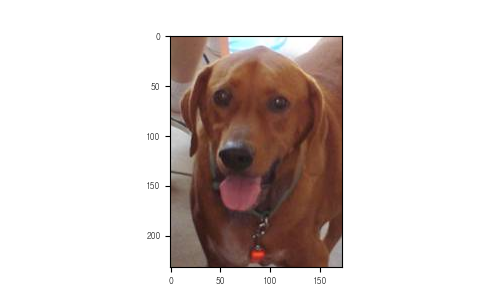

In [81]:
image = load_img(test_path+sample)
plt.figure(figsize=(5,3))
plt.imshow(image)